In [76]:
import random
import numpy
import simpy

RANDOM_SEED = 42
NEW_CUSTOMERS = 100000  # Total number of customers
num_servers = 1  # Generate new customers roughly every x seconds
service_rate = 1  # On average, a customer is served every x seconds
rho = 0.9
arrival_rate = rho * service_rate*num_servers

def source(env, number, arrival_rate, counter, wait_times):
    for i in range(number):
        c = customer(env, counter, wait_times, service_rate)
        env.process(c)
        t = np.random.exponential(1/arrival_rate)
        yield env.timeout(t)

def customer(env, counter, wait_times, service_rate):
    arrive = env.now

    with counter.request() as req:
        # Wait for the counter
        yield req

        wait = env.now - arrive
        wait_times.append(wait)

        service_time = np.random.exponential(1/service_rate)
        yield env.timeout(service_time)

# Setup and start the simulation
np.random.seed(RANDOM_SEED)
env = simpy.Environment()
wait_times = []

# Start processes and run
counter = simpy.Resource(env, capacity=num_servers)
env.process(source(env, NEW_CUSTOMERS, arrival_rate, counter, wait_times))
env.run()

print(arrival_rate)
print(service_rate)
print(numpy.mean(wait_times))

0.9
1
9.077125209037662


In [19]:
import numpy as np 
from scipy.stats import ttest_1samp
from Base import queueing_system

num_servers = 1
service_rate = 1

rho = np.linspace(0.8, 0.99, 10, endpoint=True)
mean_arrival_rate = []
num_customers = 1000000
convergence_num_customers = []
for a in rho:
    arrival_rate = a * service_rate*num_servers
    W = queueing_system(num_customers, arrival_rate, service_rate, num_servers, seed = 42)
    print(np.mean(W))

    for b in range(2, len(W), 1000):
        _, p = ttest_1samp(W[:b],W[-1])
        if p > 0.01:
            convergence_num_customers.append(b)
            break

3.9872361056581735
4.620320013361941
5.402638938608816
6.340859397100334
7.896007577477348
9.896162324176865
13.022555671417344
18.84065630063277
29.19827142391625
90.38628282409034


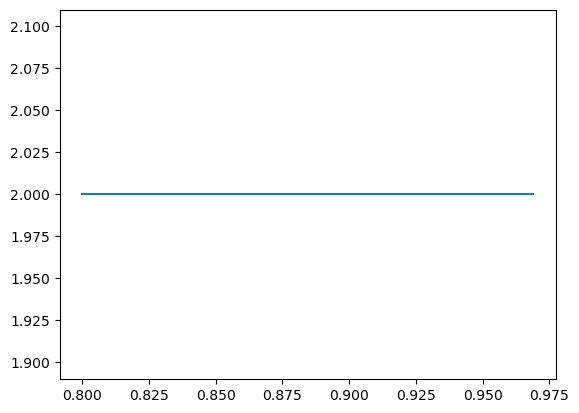

In [23]:
from matplotlib import pyplot as plt
plt.plot(rho[:9], convergence_num_customers[:9])